In [1]:
# %%
%pip install pandas
%pip install scikit-learn
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# %%
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

In [4]:
# %%
# Load the Dataset
df = pd.read_csv("Data/sample_results_dataset1.csv")
df.head()

,ReferenceNumber,SAT,GCSE,GCE AS,GCE A
0,1,127,6,B,A
1,2,121,5,A,B
2,3,111,6,B,C
3,4,102,7,A,A*
4,5,118,5,D,B


In [5]:
# %%
# Mapping for A-level grades
a_level_points = {
    "A*": 60,
    "A": 50,
    "B": 40,
    "C": 30,
    "D": 20,
    "E": 10,
    "U": 0
}

df["GCE_A_Value"] = df["GCE A"].map(a_level_points)

# %%
# Mapping for AS-level grades
as_level_points = {
    "A": 25,
    "B": 20,
    "C": 15,
    "D": 10,
    "E": 5,
    "U": 0
}

df["GCE_AS_Value"] = df["GCE AS"].map(as_level_points)

In [6]:
# %%
# Standardize the Data (for clustering)
df[["GCE_A_ValueStan", "GCE_AS_ValueStan", "GCSEStan", "SATStan"]] = StandardScaler().fit_transform(
    df[["GCE_A_Value", "GCE_AS_Value", "GCSE", "SAT"]]
)
df.head()

,ReferenceNumber,SAT,GCSE,GCE AS,GCE A,GCE_A_Value,GCE_AS_Value,GCE_A_ValueStan,GCE_AS_ValueStan,GCSEStan,SATStan
0,1,127,6,B,A,50,20,0.677878,0.503470,0.599817,1.363227
1,2,121,5,A,B,40,25,-0.050240,1.178363,-0.074893,0.856702
2,3,111,6,B,C,30,20,-0.778358,0.503470,0.599817,0.012494
3,4,102,7,A,A*,60,25,1.405995,1.178363,1.274526,-0.747293
4,5,118,5,D,B,40,10,-0.050240,-0.846316,-0.074893,0.603440


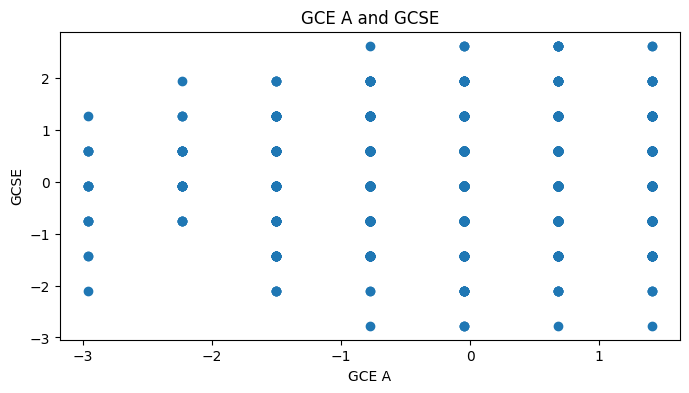

In [7]:
# %%
# Visualise A levels and GCSE
plt.figure(figsize=(8,4))
plt.scatter(df["GCE_A_ValueStan"], df["GCSEStan"])
plt.title("GCE A and GCSE")
plt.xlabel("GCE A")
plt.ylabel("GCSE")
plt.show()

In [8]:
# %%
# Fit final KMeans model using chosen K
optimal_k = 3
kmeans = KMeans(
    n_clusters=optimal_k,
    init="k-means++",
    n_init="auto",
    random_state=0
)

kmeans.fit(df[["GCE_A_ValueStan", "GCE_AS_ValueStan", "GCSEStan", "SATStan"]])
df["Cluster"] = kmeans.labels_

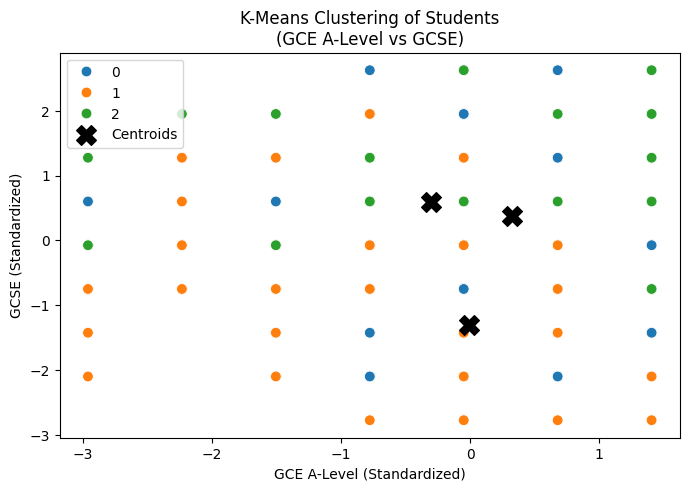

In [9]:
# Plot clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="GCE_A_ValueStan",
    y="GCSEStan",
    hue="Cluster",
    palette="tab10",
    s=60
)

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=200,
    c="black",
    marker="X",
    label="Centroids"
)

plt.title("K-Means Clustering of Students\n(GCE A-Level vs GCSE)")
plt.xlabel("GCE A-Level (Standardized)")
plt.ylabel("GCSE (Standardized)")
plt.legend()
plt.show()


In [10]:

# %%
# Find the optimal K Value
import warnings
warnings.filterwarnings('ignore')

TotVar = []
Silhouette = []

StartK = 2
EndK = 15

for K in range(StartK, EndK):
    kmeans = KMeans(
        n_clusters=K,
        init="k-means++",
        n_init="auto",
        random_state=0
    )
    
    kmeans.fit(df[["GCE_A_ValueStan", "GCSEStan"]])
    labels = kmeans.labels_
    
    Silhouette.append(silhouette_score(df[["GCE_A_ValueStan", "GCSEStan"]], labels))
    TotVar.append(kmeans.inertia_)


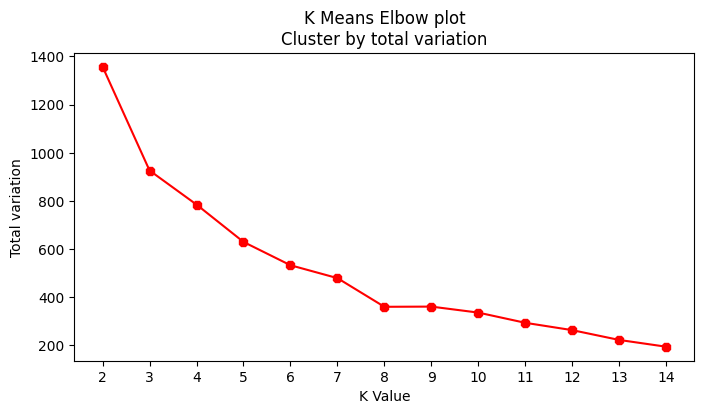

In [11]:

# %%
# Elbow plot
plt.figure(figsize=(8,4))
plt.plot(range(StartK, EndK), TotVar, color="red", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(StartK, EndK,1))
plt.ylabel("Total variation")
plt.title("K Means Elbow plot\nCluster by total variation")
plt.show()


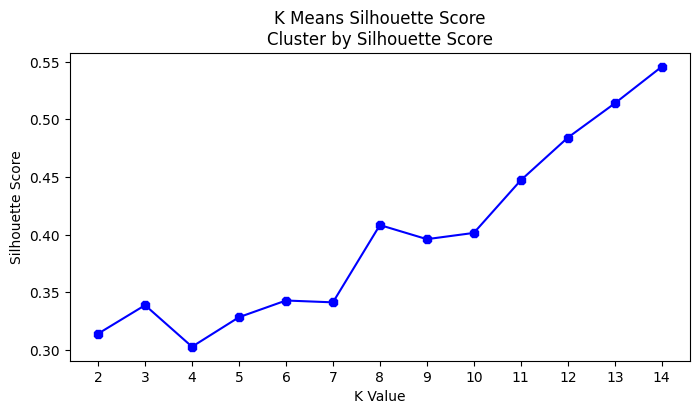

In [12]:

# %%
# Silhouette plot
plt.figure(figsize=(8,4))
plt.plot(range(StartK, EndK), Silhouette, color="blue", marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(StartK, EndK,1))
plt.ylabel("Silhouette Score")
plt.title("K Means Silhouette Score\nCluster by Silhouette Score")
plt.show()


In [13]:

# %%
# Table of results
LoopResults = pd.DataFrame(np.arange(StartK, EndK,1), columns=["K Value"])
LoopResults["Total Variation"] = TotVar
LoopResults["Silhouette Score"] = Silhouette
print(LoopResults)


    K Value  Total Variation  Silhouette Score
0         2      1357.145937          0.314078
1         3       925.951083          0.338798
2         4       784.330697          0.302770
3         5       629.180796          0.328383
4         6       532.372327          0.342856
5         7       478.828043          0.341262
6         8       359.695151          0.408315
7         9       360.492077          0.396070
8        10       335.575227          0.401498
9        11       293.145258          0.447186
10       12       262.669041          0.484128
11       13       221.933914          0.513847
12       14       193.818611          0.545659


In [14]:

# %%
# Final K-Means using K=8
kmeans = KMeans(n_clusters=8, init="k-means++", n_init="auto", random_state=0)
df["Cluster"] = kmeans.fit_predict(df[["GCE_A_ValueStan", "GCSEStan"]])
df.head()


,ReferenceNumber,SAT,GCSE,GCE AS,GCE A,GCE_A_Value,GCE_AS_Value,GCE_A_ValueStan,GCE_AS_ValueStan,GCSEStan,SATStan,Cluster
0,1,127,6,B,A,50,20,0.677878,0.503470,0.599817,1.363227,0
1,2,121,5,A,B,40,25,-0.050240,1.178363,-0.074893,0.856702,5
2,3,111,6,B,C,30,20,-0.778358,0.503470,0.599817,0.012494,1
3,4,102,7,A,A*,60,25,1.405995,1.178363,1.274526,-0.747293,0
4,5,118,5,D,B,40,10,-0.050240,-0.846316,-0.074893,0.603440,5


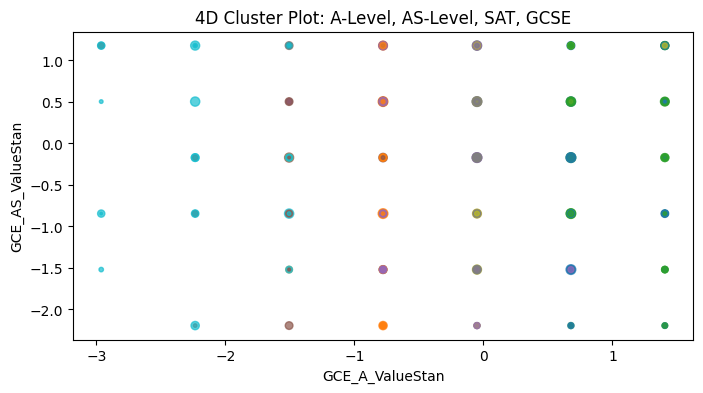

In [15]:
plt.figure(figsize=(8,4))
plt.scatter(
    df["GCE_A_ValueStan"],
    df["GCE_AS_ValueStan"],
    s=df["SATStan"] * 20,      # scale size
    c=df["Cluster"],           # color by cluster
    cmap="tab10",
    alpha=0.7
)
plt.title("4D Cluster Plot: A-Level, AS-Level, SAT, GCSE")
plt.xlabel("GCE_A_ValueStan")
plt.ylabel("GCE_AS_ValueStan")
plt.show()


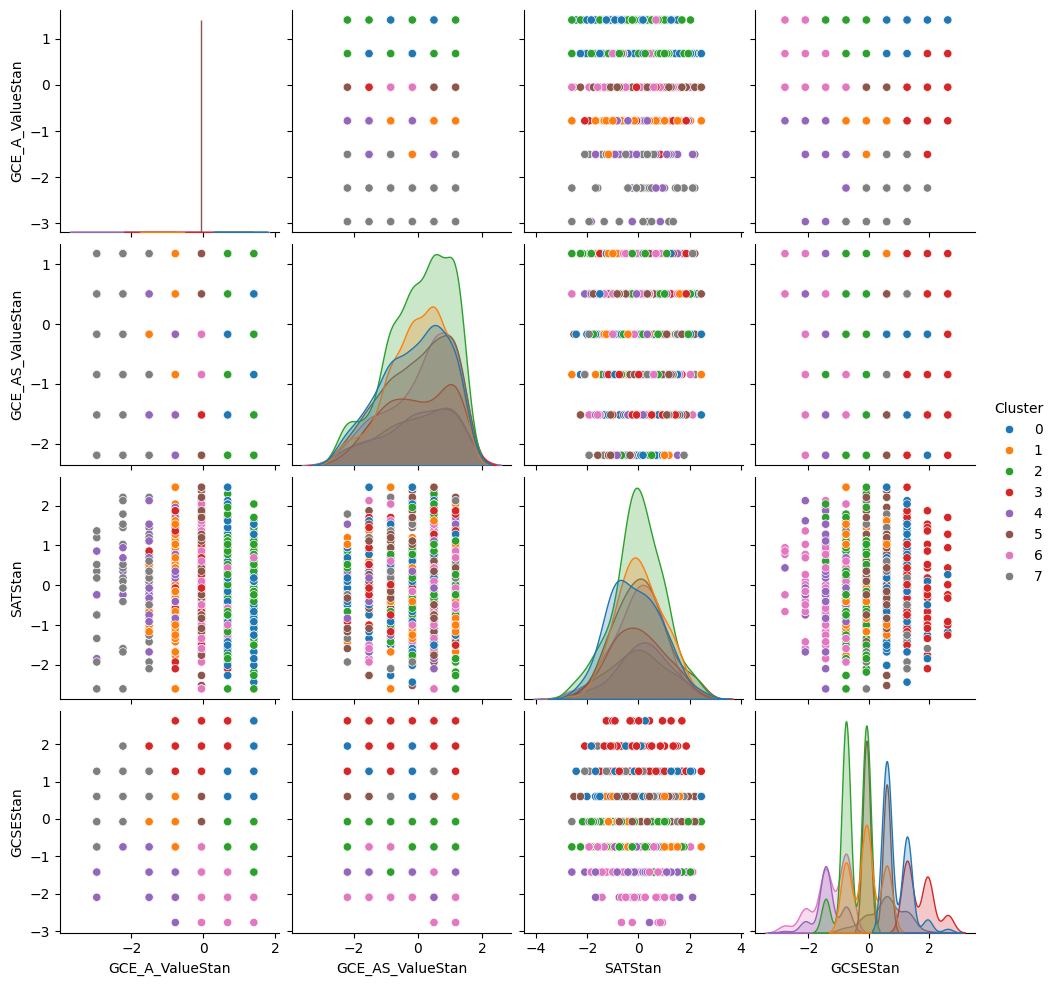

In [16]:
sns.pairplot(
    df,
    vars=["GCE_A_ValueStan", "GCE_AS_ValueStan", "SATStan", "GCSEStan"],
    hue="Cluster",
    palette="tab10"
)
plt.show()

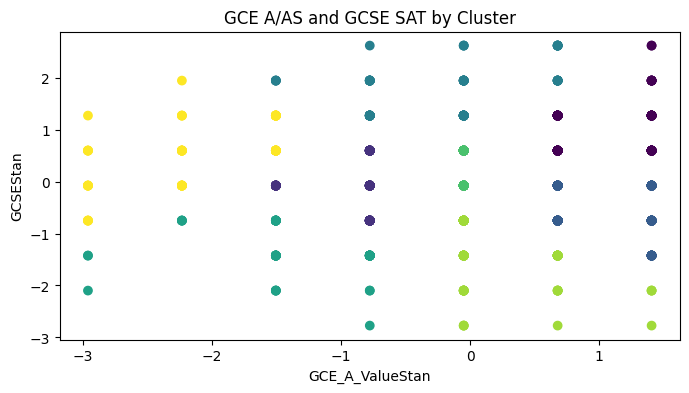

In [17]:

# %%
# Visualise the 8 Clusters
plt.figure(figsize=(8,4))
plt.scatter(df["GCE_A_ValueStan"], df["GCSEStan"], c=df["Cluster"])
plt.title("GCE A/AS and GCSE SAT by Cluster")
plt.xlabel("GCE_A_ValueStan")
plt.ylabel("GCSEStan")
plt.show()

# -------------------------------------------------------------------
# 🚀 NEW SECTION: LOGISTIC REGRESSION TO PREDICT A GRADES
# -------------------------------------------------------------------

# %%
# Create binary target: 1 = A or A*, 0 = everything else
df["A_Grade"] = df["GCE A"].isin(["A", "A*"]).astype(int)


In [18]:
# %%
# Select predictors for logistic regression
features = ["GCSE", "GCE_AS_Value", "Cluster"]
X = df[features]
y = df["A_Grade"]


In [19]:
# %%
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [20]:
# %%
# Scale ALL predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# %%
# Fit Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [22]:
# %%
# Evaluate Model
y_pred = log_reg.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       147
           1       0.67      0.87      0.76       103

    accuracy                           0.77       250
   macro avg       0.78      0.79      0.77       250
weighted avg       0.80      0.77      0.77       250

Confusion Matrix:
[[103  44]
 [ 13  90]]


In [23]:

# %%
# Add predicted probability of achieving an A grade
df["Prob_A"] = log_reg.predict_proba(scaler.transform(df[features]))[:, 1]
df[["GCE A", "Prob_A"]].head()


,GCE A,Prob_A
0,A,0.778045
1,B,0.108403
2,C,0.633060
3,A*,0.707465
4,B,0.138809
